In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [2]:
library(ggplot2)
library(ggthemes)

In [3]:
df = read.csv("../data/obesity_by_inequality_by_country_gender_20170511.csv")

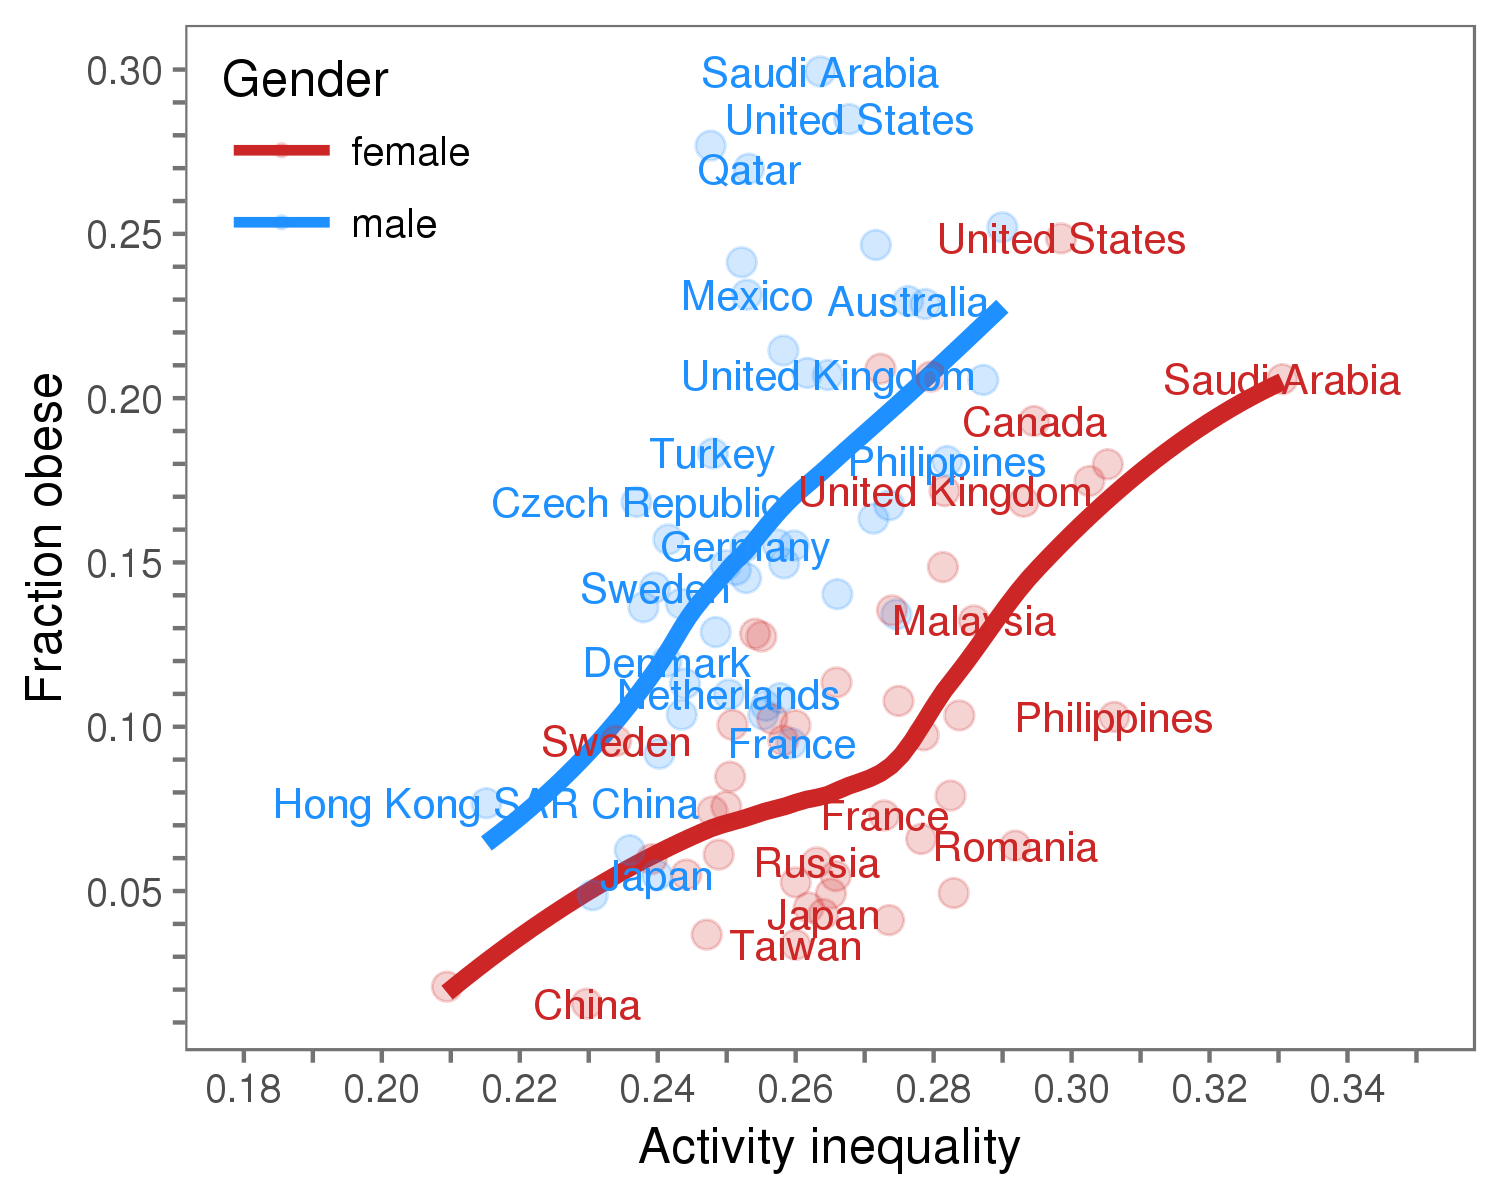

In [4]:
p <- ggplot(df, aes(steps_gini, obesity_mean, color=factor(gender), 
            label=country))
p <- p + geom_smooth(method="loess",span=.9,  se = F, size=2.0, alpha=1.0, method.args=list(family="symmetric")) 
p <- p + geom_point(alpha=.2, size=3.0)
p <- p + geom_text(check_overlap = T, size=3.5)
p <- p + xlab("Activity inequality") + ylab("Fraction obese")
p <- p  + guides(size=FALSE) 
p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + scale_color_manual(values=c("firebrick3","dodgerblue"), name = "Gender")

# xticks
ticks = seq(.10,.36,by=0.01) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%.2f", ticks[seq(1, length(labels), 2)])
p <- p + scale_x_continuous(breaks=ticks, labels=labels, limits=c(.18, .35))
# yticks
ticks = seq(.00,.30,by=0.01) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 5)] = sprintf("%.2f", ticks[seq(1, length(labels), 5)])
p <- p + scale_y_continuous(breaks=ticks, labels=labels)

# legend
p <- p + theme(legend.justification=c(0,1), legend.position=c(0.01, .99), legend.direction="vertical", 
               legend.box.just = "left", legend.key.width=unit(2,"line"))
p <- p + guides(color = guide_legend(override.aes = list(size=1.2)))

p

ggsave(filename="../output/edfig3b.pdf", plot=p, width=4, height=3)